Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering

### Reading the serial port of an Arduino device  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [7]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import sys
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1. Setup serial communication


In [8]:
port  = '/dev/ttyUSB0'  # change this address according to your computer
baud  =  9600           # match this number with the Arduino's output baud rate

Ardn  =  serial.Serial(port, baud, timeout=1)


### 2. Define function for reading one incoming line

In [9]:
def ReadLine(nchar, nvar):
    ''' 
    nchar: number of characters per line (including CR character)
    nvar:  number of variables in each line
    '''

    err = True
    Ardn.write(b'0')  #  send request byte

    while(err):
        try:
            if (Ardn.inWaiting() > nchar):
                bdat = Ardn.readline() 
                sdat = bdat.decode()
                err  = False
        except:
            err = True

    sdat = sdat.replace('\n',' ').split()
    return  np.array(sdat[0:nvar], dtype='uint32')


### 3. Acquire data lines from serial port

In [10]:
n     =  128
D     =  np.empty((3,n), dtype='uint32')

try:
    for i in  range(n):
        D[0,i], D[1,i], D[2,i] = ReadLine(27, 3)

    Ardn.close()
    print('Acquisition ok!')

except:
    Ardn.close()
    sys.exit('Acquisition failure!')


Acquisition ok!


### 4. Save the data into an Excel file 

In [11]:
data      =  pd.DataFrame(data = D.T)
filename  = 'resources/ReadSerial.xlsx'
excelfile =  pd.ExcelWriter(filename)

data.to_excel(excelfile,filename)
excelfile.save()


### 5. Data visualization

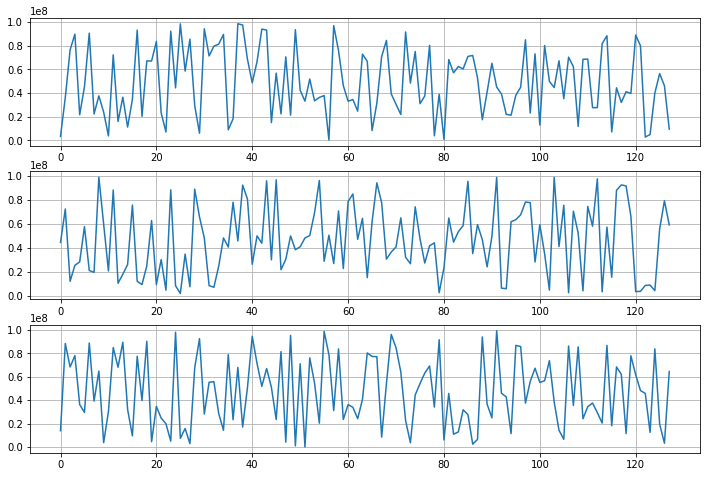

In [13]:
fig01  = plt.figure(1, figsize=(12,8))

fig01a = plt.subplot(3,1,1)
plt.plot(D[0,:])
plt.grid(True)
                    
fig01a = plt.subplot(3,1,2)
plt.plot(D[1,:])
plt.grid(True)

fig01a = plt.subplot(3,1,3)
plt.plot(D[2,:])
plt.grid(True)


### 6. Useful links

[1. Bluetooth module HC-05 configuration](https://www.arduinoecia.com.br/modulo-bluetooth-hc-05-conversor-ftdi/)   
[2. Programming Arduino Mini through FTDI232RL interface](https://www.arduinoecia.com.br/conversor-ftdi-ft232rl-arduino-pro-mini/)   
[3. How to use the logic level converter](https://www.arduinoecia.com.br/conversor-de-nivel-logico-33-5v-Arduino/)   
[4. LCD display with I2C communication](https://www.arduinoecia.com.br/modulo-i2c-display-16x2-arduino/)   
[5. Data logger with real time clock DS3231 and SD card module](https://www.filipeflop.com/blog/datalogger-com-arduino-cartao-sd/)   

